In [1]:
import numpy as np
import pandas as pd
import healpy as hp
from DS_Planck_Unet import train_pix_act, draw_pic, val_pix, test_pix
from DS_healpix_fragmentation import radec2pix, one_pixel_fragmentation, matr2dict
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

In [12]:
a = np.ones(hp.nside2npix(2))
a[train_pix_act] = 0
a[val_pix] = 0

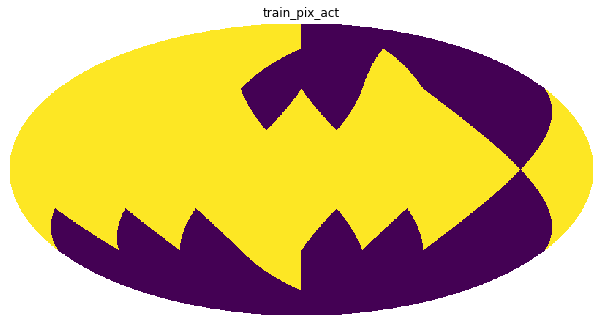

In [13]:
hp.mollview(a, nest=True, title='train_pix_act', cbar=False)

In [9]:
abell = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/Abell.csv')

In [11]:
ra, dec = abell.iloc[2198]['RA'], abell.iloc[2198]['DEC']

In [15]:
pix2, pix11 = radec2pix(ra, dec, 2), radec2pix(ra, dec, 2**11)

In [16]:
matr = one_pixel_fragmentation(2, pix2, 10)
pix11

1689334

In [47]:
mdict = matr2dict(matr)
x, y = mdict[pix11]
x, y

(669, 430)

In [32]:
coords = [(247.0343, 39.5769), (247.2617, 39.5674), (247.1504, 39.4382), (247.1566, 39.6125)]
for r, d in coords:
    x1, y1 = mdict[radec2pix(r, d, 2**11)]
    print(x - x1, y - y1)

-1 -2
4 0
-3 3
3 -2


In [48]:
size=16
sm_matr = matr[x-size:x+size+1, y-size:y+size+1]

In [49]:
pic = draw_pic(sm_matr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


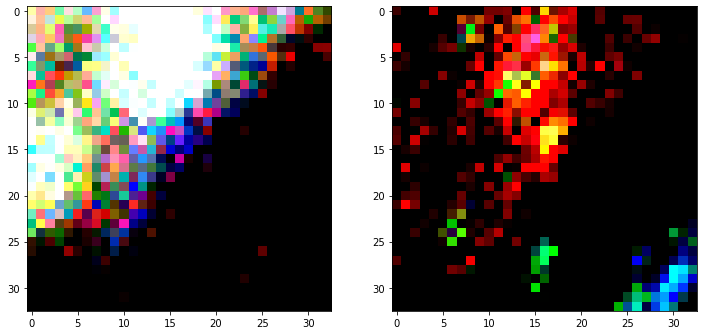

In [50]:
_, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(pic[:,:,:3])
ax[1].imshow(pic[:,:,3:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


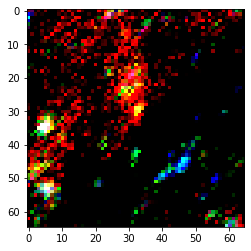

In [25]:
plt.imshow(pic[:, :, 3:])

In [2]:
act = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')

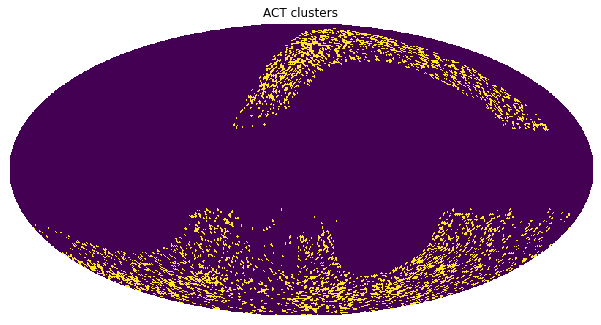

In [6]:
nside = 2**6
a = np.zeros(hp.nside2npix(nside))
a[radec2pix(act['RA'], act['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='ACT clusters', cbar=False)

In [2]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
df = df[df['status'] == 'tp']

In [5]:
np.count_nonzero(df['M500'] > 2) / len(df)

0.6924788607031598

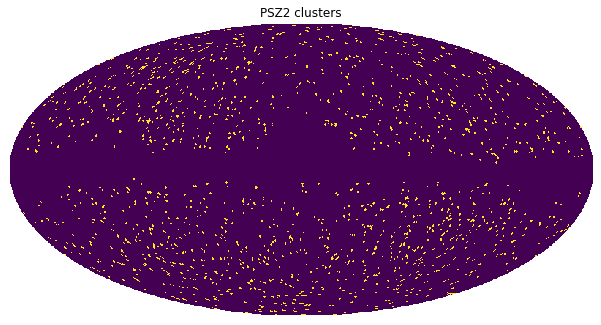

In [3]:
psz2 = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/PSZ2.csv')

nside = 2**6
a = np.zeros(hp.nside2npix(nside))
a[radec2pix(psz2['RA'], psz2['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='PSZ2 clusters', cbar=False)

In [4]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
brcat = pd.read_csv('/home/rt2122/Data/SRGz/brcat.csv')

In [6]:
df = df[df['status'] != 'fp']
df_sc = SkyCoord(ra=np.array(df['RA'])*u.degree, dec=np.array(df['DEC'])*u.degree, frame='icrs')
br_sc = SkyCoord(ra=np.array(brcat['RA'])*u.degree, dec=np.array(brcat['DEC'])*u.degree, frame='icrs')
_, d2d, _ = df_sc.match_to_catalog_sky(br_sc)
np.count_nonzero(d2d.degree > 5 / 60)

739

In [7]:
df = df[d2d.degree > 5 / 60]
len(df)

739

In [9]:
df = df[df['z'] != -1]

Text(0, 0.5, 'M500')

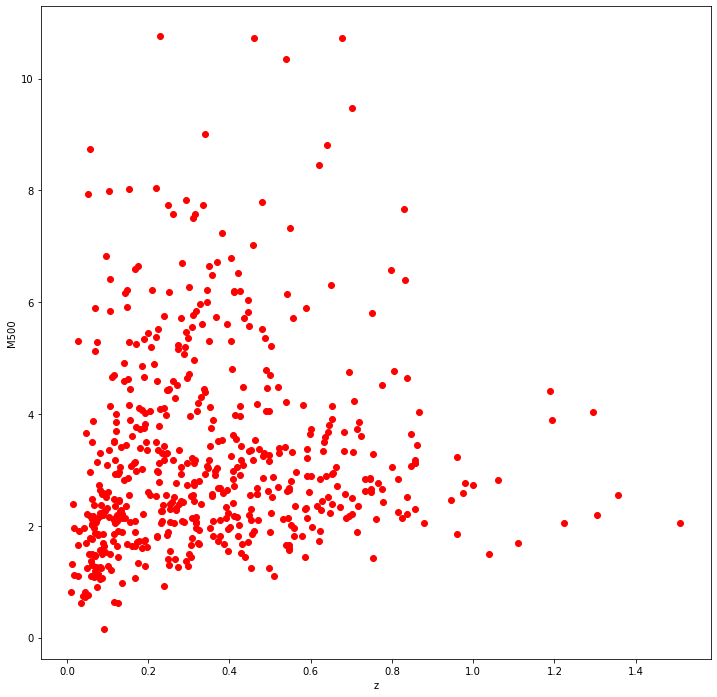

In [13]:
_, ax = plt.subplots(1, 1, figsize=(12, 12))
s = ax.scatter(df['z'], df['M500'], c='r')
ax.set_xlabel('z')
ax.set_ylabel('M500')

In [2]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8.csv')

In [3]:
list(df)

['RA',
 'DEC',
 'area',
 'min_rad',
 'max_rad',
 'mean_rad',
 'min_pred',
 'max_pred',
 'tRA',
 'tDEC',
 'status',
 'catalog',
 'M500',
 'z',
 'pix2']

In [4]:
df[['RA',
 'DEC',
 'area',
 'min_rad',
 'max_rad',
 'mean_rad',
 'min_pred',
 'max_pred']]

RA        DEC  area   min_rad   max_rad  mean_rad  min_pred  \
0      287.002617  16.563571   2.0  0.485261  1.124703  0.809056  0.105400   
1      286.821791  17.169244   1.0  0.000000  1.414214  0.853553  0.108591   
2      287.105345  15.896636   1.0  0.000000  1.414214  0.853553  0.102907   
3      278.743982  38.290619  29.0  2.116807  4.716900  3.127882  0.101256   
4      285.057804  21.935581  31.0  1.811791  4.225424  3.193153  0.108951   
...           ...        ...   ...       ...       ...       ...       ...   
27708  359.693397 -41.485077   NaN       NaN       NaN       NaN       NaN   
27709  359.701568  18.601526   NaN       NaN       NaN       NaN       NaN   
27710  359.886623   2.138933   NaN       NaN       NaN       NaN       NaN   
27711  359.889739 -46.143625   NaN       NaN       NaN       NaN       NaN   
27712  359.929871 -50.169846   NaN       NaN       NaN       NaN       NaN   

       max_pred  
0      0.111802  
1      0.108591  
2      0.102907  
3      0.756920  
4      0.700417  
...         ...  
27708       NaN  
27709       NaN  
27710       NaN  
27711       NaN  
27712       NaN  

[27713 rows x 8 columns]